In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
N, D, H = 64, 1000, 100
x   = tf.placeholder(tf.float32, shape=(N, D))
y   = tf.placeholder(tf.float32, shape=(N, D))
w1  = tf.Variable(tf.random_normal((D,H)),name="w1")
w2  = tf.Variable(tf.random_normal((H,D)),name="w2")
h  = tf.maximum(tf.matmul(x, w1), 0)
y_pred = tf.matmul(h, w2)
diff = y - y_pred 
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
grade_w1,grade_w2=tf.gradients(loss,[w1,w2])

In [10]:

#Using Optimizer SGD Momentom
vx_w1=tf.zeros(shape=[D,H],dtype=tf.float32,name="vx1")
vx_w2=tf.zeros(shape=[H,D],dtype=tf.float32,name="vx2")
#vx_w1=tf.Variable(tf.zeros(shape=[D,H],dtype=tf.float32),name="vx1")
#vx_w2=tf.Variable(tf.zeros(shape=[H,D],dtype=tf.float32),name="vx2")

Rho = tf.constant(0.9, name='Rho')

learning_rate=1e-5
#vx_w1=vx_w1.assign(Rho*vx_w1 + grade_w1)

vx_w1=Rho*vx_w1 + grade_w1
new_w1= w1.assign(w1-learning_rate*vx_w1)

#vx_w2==vx_w2.assign(Rho*vx_w2 + grade_w2)
vx_w2=Rho*vx_w2 + grade_w2
new_w2   = w2.assign(w2-learning_rate*vx_w2)

Update   = tf.group(new_w1,new_w2)

Q        = tf.group(vx_w1,vx_w2)

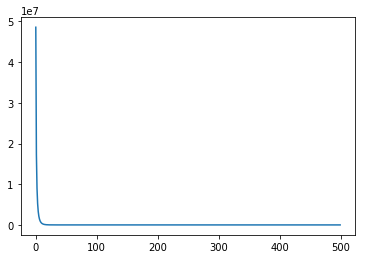

[48575450.0, None, None] [969.7647, None, None]


In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N, D),
              y: np.random.randn(N, D),}
    
    loss_summery=[]
    steps=500
    for t in range(steps):
        out = sess.run([loss,Update,Q],feed_dict=values)
        loss_val = out
        loss_summery.append(loss_val)
    plt.plot(range(steps), loss_summery)
    plt.show()
    print(loss_summery[0],loss_summery[steps-1])

    
